# Data Generator (20/11/2018)

This notebook is to test data generation for the synthetic datasets.
We need a suitable random number generator. It is important that it does not show any patterns as the Neural Net might pick up on them. For this reason, a RNG with a large period is needed.

## Comparing RNGs 

| Linear Congruence Generator  (Java)   | Mersenne Twister      (Python)      |
|---------------------------------------|-------------------------------------|
|   __period: 2^48__                    | __period: 2^19937 - 1__             |
|   little state                        | more state                          |
|   __very fast__                       | __still quite fast__                |
|   passes most tests for randomness    | does not pass some tests            |
|   cryptographically secure            | not cryptographically secure        |

## Python's RNG: The Mersenne Twister

The python random library uses a Mersenne Twister that has a period of 2^19937 - 1, which guarantees for repetition to never be a problem in our simulation.
It should be fast enough to generate data on the fly although it is not as fast as a LCG.
We do not care about the tests it does not pass as they do not create patterns that hinder us.
Cryptographic security is also not a concern. Therefore, we shall be using Python's random library.

In [2]:
import random, numpy
import matplotlib
import matplotlib.pyplot as plt

Set some constants

In [3]:
N_KEYS = 100000 #Number of keys in the index
MAX_BLOCK_SIZE = 9 #Maximum size of blocks where the same key appears multiple times
N_INTERPOLATIONS = 10 #For calculating a spread of how likely a jump is
N_RUNS = 100 #Number of iterations with different seeds
N_SAMPLES = 1000 #Number of points where access is sampled

Set the seed:

In [4]:
random.seed(19937)

## Creating the data

__Problem:__ We have to control two variables: The size of the bins, and the variation of the keys.

**Solution:** Only vary the bin size, leave the step size even, corresponding to a standard time series.

So we want to create lists of numbers that correspond to the bin sizes of the range index. (Later: lists of 4 byte (2 byte?) integers for the block size)

The one extreme is an array of blocks of 1, i.e. a collection of unique and evenly ascending numbers.

In [5]:
min_entropy_list = [1 for p in range(0, N_KEYS)]

In [6]:
print(str(min_entropy_list[0:500]) + " ...")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

The other extreme is completely random block size in a specified range:

In [7]:
max_entropy_list = [random.randrange(MAX_BLOCK_SIZE)+1 for p in range(0, N_KEYS)]

In [8]:
print(str(max_entropy_list[0:500]) + " ...")

[8, 3, 2, 2, 9, 3, 5, 4, 2, 3, 9, 5, 3, 6, 9, 7, 9, 7, 8, 6, 2, 3, 2, 5, 3, 3, 8, 3, 9, 2, 8, 7, 3, 7, 9, 3, 5, 9, 5, 8, 9, 3, 8, 8, 1, 8, 3, 2, 5, 3, 1, 4, 9, 5, 9, 5, 8, 4, 1, 2, 7, 9, 9, 1, 3, 5, 8, 6, 4, 1, 2, 8, 3, 8, 2, 1, 6, 9, 5, 4, 9, 4, 3, 6, 7, 1, 2, 4, 2, 7, 2, 6, 3, 7, 7, 5, 4, 1, 6, 2, 8, 5, 8, 9, 2, 2, 1, 4, 3, 5, 3, 2, 4, 9, 3, 9, 3, 1, 4, 3, 6, 4, 9, 9, 6, 7, 2, 8, 1, 4, 1, 7, 3, 4, 7, 8, 5, 1, 8, 8, 6, 8, 3, 8, 8, 9, 2, 1, 8, 6, 4, 3, 8, 6, 9, 5, 7, 8, 5, 8, 7, 2, 7, 3, 6, 6, 7, 7, 2, 9, 7, 3, 3, 8, 2, 8, 1, 2, 5, 4, 9, 6, 9, 5, 3, 6, 2, 7, 1, 9, 5, 9, 8, 8, 7, 6, 1, 8, 1, 5, 8, 9, 3, 9, 8, 5, 5, 3, 6, 6, 8, 3, 2, 3, 6, 6, 9, 1, 3, 9, 9, 6, 4, 4, 5, 9, 3, 8, 5, 1, 3, 2, 9, 3, 1, 4, 8, 4, 1, 7, 1, 7, 2, 9, 3, 3, 7, 6, 5, 1, 6, 7, 5, 5, 7, 6, 6, 4, 8, 8, 1, 4, 9, 8, 3, 7, 1, 3, 4, 6, 5, 6, 2, 8, 4, 7, 4, 7, 3, 6, 5, 7, 9, 3, 6, 9, 4, 9, 2, 7, 1, 4, 8, 6, 6, 3, 5, 8, 8, 7, 1, 7, 5, 1, 2, 7, 9, 3, 7, 8, 3, 4, 9, 5, 3, 9, 8, 1, 4, 1, 3, 8, 5, 5, 2, 3, 6, 2, 7, 4, 7, 8, 9, 

### Now, find a generalised way to create these.

__Note:__  Do we want data of the same size or the same number of keys? If the former, we need to make sure the sum of the array entries is (roughly) equal. For now, just fix the number of keys. Later, could also just fill up the remaining space with 0s.

__Note:__ There are two distributions needed here for differentiating the different interpolations, one for the occurrence of different size buckets, and one for the actual size of the buckets.

In [9]:
def get_bucket_array(size, ratio):
    bucket_array=[]
    for _ in range(0, size):
        if random.uniform(0,1)<ratio:
            bucket_array.append(random.randrange(MAX_BLOCK_SIZE)+1)
        else:
            bucket_array.append(1)
    return bucket_array

In [10]:
blocks = []
for i in range(N_RUNS):
    random.seed(i)
    blocks.append([get_bucket_array(N_KEYS, 1/N_INTERPOLATIONS * x) for x in range(0, N_INTERPOLATIONS)])

(__Edit 29/11/2018__: added the mean of the distributions)

In [63]:
for x in range(len(blocks[0])):
    print("block {}: {} ... (avg: {})\n".format(x, blocks[0][x][0:30],numpy.mean(blocks[0][x])))

block 0: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... (avg: 1.0)

block 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... (avg: 1.40309)

block 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 9, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... (avg: 1.80267)

block 3: [4, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 7, 4, 1, 1, 6, 1, 1, 6, 1, 3, 1, 8, 1, 1, 1, 1] ... (avg: 2.20728)

block 4: [8, 2, 1, 1, 1, 1, 3, 1, 1, 5, 1, 1, 5, 5, 1, 1, 3, 1, 1, 1, 7, 1, 1, 6, 1, 1, 1, 1, 1, 1] ... (avg: 2.60349)

block 5: [9, 1, 5, 1, 8, 1, 1, 1, 3, 5, 1, 8, 9, 7, 1, 1, 1, 1, 7, 5, 1, 6, 3, 2, 7, 1, 7, 1, 2, 6] ... (avg: 2.99755)

block 6: [1, 7, 8, 1, 1, 8, 1, 1, 3, 8, 1, 4, 1, 1, 6, 1, 2, 7, 2, 8, 1, 1, 7, 1, 3, 3, 1, 1, 1, 6] ... (avg: 3.40644)

block 7: [4, 2, 8, 7, 1, 3, 1, 8, 1, 1, 7, 1, 1, 9, 1, 4, 1, 7, 2, 1, 3, 6, 9, 1, 3, 5, 5, 2, 6, 7] ... (avg: 3.82657)

block 8: [3, 5, 3, 7, 5, 2, 3, 3, 1, 1, 1, 6

(__Edit 29/11/2018__:) Let us plot the CDFs:

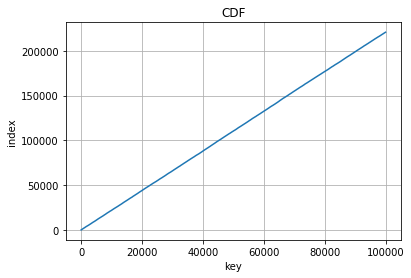

In [56]:
# Data for plotting
x = numpy.arange(0, N_KEYS, 1)
y = numpy.add.accumulate(blocks[0][3])

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='key', ylabel='index',
       title='CDF')
ax.grid()

fig.savefig("CDF.png")
plt.show()

That looks completely linear! Let us zoom in:

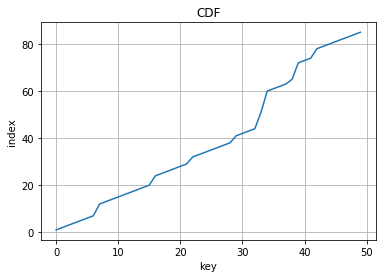

In [57]:
# Data for plotting
x = numpy.arange(0, 50, 1)
y = numpy.add.accumulate(blocks[0][3][1000:1050])

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='key', ylabel='index',
       title='CDF')
ax.grid()

fig.savefig("CDF_ZOOM.png")
plt.show()

# Comparing Access Speeds between Array and B-Tree (29/11/2018)

## Create "real" data from blocks

In [1]:
data = []
for x in range(N_RUNS):
    data.append([])
    for i in range(len(blocks[x])):
        data[x].append([])
        for j in range(len(blocks[x][i])):
            for k in range(blocks[x][i][j]:
                data[x][i].append(j)
                data[x][i].append(0)

SyntaxError: invalid syntax (<ipython-input-1-e4c7460792dd>, line 7)

The data are now arranged as __"key, value, key, value ..."__ in arrays:

In [65]:
print("{}".format(data[0][0][0:100]))

[0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 13, 0, 14, 0, 15, 0, 16, 0, 17, 0, 18, 0, 19, 0, 20, 0, 21, 0, 22, 0, 23, 0, 24, 0, 25, 0, 26, 0, 27, 0, 28, 0, 29, 0, 30, 0, 31, 0, 32, 0, 33, 0, 34, 0, 35, 0, 36, 0, 37, 0, 38, 0, 39, 0, 40, 0, 41, 0, 42, 0, 43, 0, 44, 0, 45, 0, 46, 0, 47, 0, 48, 0, 49, 0]


However, for better readability, here they are arranged as tuples:

In [67]:
for x in range(len(data[0])):
    print("data {}: {} \n".format(x,[(data[0][x][i], data[0][x][i+1]) for i in range(0,52,2)]))

data 0: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0)] 

data 1: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0)] 

data 2: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (10, 0), (11, 0), (11, 0), (11, 0), (11, 0), (12, 0), (13, 0), (13, 0), (13, 0), (13, 0), (13, 0), (13, 0), (13, 0), (13, 0), (13, 0)] 

data 3: [(0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (2, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (12, 0), (12, 0), (12, 0)] 

data 4: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0

## Array model

Prediction: Scale key by the ration of input size by number of keys. (Divide by two for only the key.)

Count: Number of required array reads.

In [19]:
def array_predict(input_data, key):
    count=0
    prediction=int((len(input_data)/N_KEYS)*key/2)*2
    #print("prediction: {}".format(prediction))
    while (input_data[prediction]<key):
        prediction+=2
        count+=1
    while (input_data[prediction]>key):
        prediction-=2
        count+=1
    if(input_data[prediction]!=key):
        raise Exception("key not found!")
    #print("actual: {}".format(prediction))
    return count
    

Let's make some predictions!

In [150]:
predictions = []
for i in range(N_RUNS):
    predictions.append([])
    for j in range(len(data[i])):
        predictions[i].append([array_predict(data[i][j],x) for x in range(0,N_KEYS,int(N_KEYS/N_SAMPLES))])

This is the distribution of access times in dataset 8:

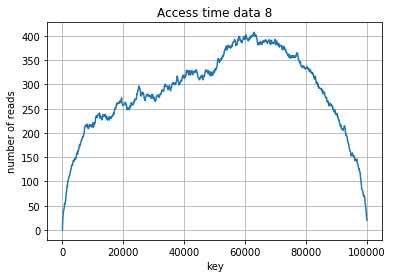

In [151]:
x = numpy.arange(0, N_KEYS, int(N_KEYS/N_SAMPLES))
y = numpy.average(predictions,axis=0)[6]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='key', ylabel='number of reads',
       title='Access time data 8')
ax.grid()

fig.savefig("test.png")
plt.show()

How many reads did they need on average?

In [130]:
array_efficiency=[numpy.mean(numpy.average(predictions,axis=0)[i]) for i in range(len(data[0]))]

In [131]:
for x in range(len(data[0])):
    print("data {}: {} \n".format(x, array_efficiency[x]))

data 0: 0.0 

data 1: 141.4595 

data 2: 192.7538 

data 3: 221.9361 

data 4: 245.44430000000003 

data 5: 258.25140000000005 

data 6: 284.43820000000005 

data 7: 270.06210000000004 

data 8: 274.0066 

data 9: 280.3823 



Or, as a plot:

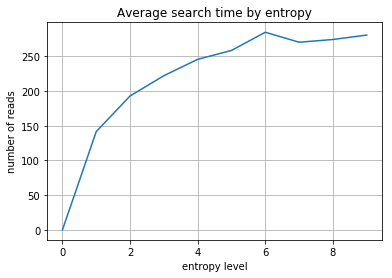

In [132]:
x = numpy.arange(0, 10, 1)
y = array_efficiency

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='entropy level', ylabel='number of reads',
       title='Average search time by entropy')
ax.grid()

fig.savefig("test.png")
plt.show()

Hmm, that is odd... I was expecting some sort of correlation between entropy and count...

__TO DO__: Test different kinds of local search for for the last step:

- Binary Search

- Exponential Search

- Recursive Predictions

## B-Tree Model

Let us start by putting all the keys into b-trees:

In [136]:
btrees = []
for x in range(len(data[0])):
    btrees.append(BTreeSet(64))
    for i in range(0,len(data[0][x]),2):
        btrees[x].add(data[0][x][i])

In [138]:
btrees[0].count_reads_to(94321)

73

In [140]:
btree_accesses = []
for i in range(len(data[0])):
    btree_accesses.append([btrees[i].count_reads_to(x) for x in range(0,N_KEYS,int(N_KEYS/N_SAMPLES))])

This is the distribution of access times over our key set in dataset 8:

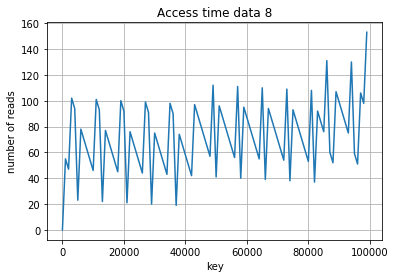

In [141]:
x = numpy.arange(0, N_KEYS, int(N_KEYS/100))
y = btree_accesses[8]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='key', ylabel='number of reads',
       title='Access time data 8')
ax.grid()

fig.savefig("btreereads.png")
plt.show()

This looks roughly as we would expect.

Now let us find the average times:

In [142]:
btree_efficiency=[numpy.mean(btree_accesses[i]) for i in range(N_INTERPOLATIONS)]

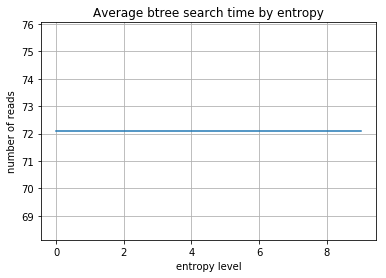

In [143]:
x = numpy.arange(0, 10, 1)
y = btree_efficiency

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='entropy level', ylabel='number of reads',
       title='Average btree search time by entropy')
ax.grid()

fig.savefig("test.png")
plt.show()

## Comparison: Array vs. B-Tree

How do the two methods compare?

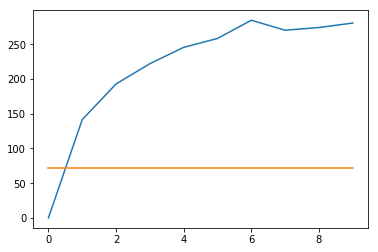

In [144]:
%matplotlib inline 

A = array_efficiency
B = btree_efficiency

# Plotting functionality starts here
plt.plot(A)
plt.plot(B)
plt.show()

This will get closer when the array uses a better local search (like exponential search) instead of linear search.

# Appendix A: B-Tree Implementation

The following is an implementation taken from https://www.nayuki.io/page/btree-set on 29/11/2018 02:00am.
I am planning to replace it with my own implementation or alter it to my needs, but for now it should suffice.

In [33]:
# 
# B-tree set (Python)
# 
# Copyright (c) 2018 Project Nayuki. (MIT License)
# https://www.nayuki.io/page/btree-set
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of
# this software and associated documentation files (the "Software"), to deal in
# the Software without restriction, including without limitation the rights to
# use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
# the Software, and to permit persons to whom the Software is furnished to do so,
# subject to the following conditions:
# - The above copyright notice and this permission notice shall be included in
#   all copies or substantial portions of the Software.
# - The Software is provided "as is", without warranty of any kind, express or
#   implied, including but not limited to the warranties of merchantability,
#   fitness for a particular purpose and noninfringement. In no event shall the
#   authors or copyright holders be liable for any claim, damages or other
#   liability, whether in an action of contract, tort or otherwise, arising from,
#   out of or in connection with the Software or the use or other dealings in the
#   Software.
# 

import numbers


class BTreeSet(object):
	
	# The degree is the minimum number of children each non-root internal node must have.
	def __init__(self, degree, coll=None):
		if not isinstance(degree, numbers.Integral):
			raise TypeError()
		if degree < 2:
			raise ValueError("Degree must be at least 2")
		self.minkeys = degree - 1      # At least 1, equal to degree-1
		self.maxkeys = degree * 2 - 1  # At least 3, odd number, equal to minkeys*2+1
		
		self.clear()
		if coll is not None:
			for obj in coll:
				self.add(obj)
	
	
	def __len__(self):
		return self.size
	
	
	def clear(self):
		self.root = BTreeSet.Node(self.maxkeys, True)
		self.size = 0
	
	
	def __contains__(self, obj):
		# Walk down the tree
		node = self.root
		while True:
			found, index = node.search(obj)
			if found:
				return True
			elif node.is_leaf():
				return False
			else:  # Internal node
				node = node.children[index]
	
	
	def add(self, obj):
		# Special preprocessing to split root node
		root = self.root
		if len(root.keys) == self.maxkeys:
			child = root
			self.root = root = BTreeSet.Node(self.maxkeys, False)  # Increment tree height
			root.children.append(child)
			root.split_child(self.minkeys, self.maxkeys, 0)
		
		# Walk down the tree
		node = root
		while True:
			# Search for index in current node
			assert len(node.keys) < self.maxkeys
			assert node is root or len(node.keys) >= self.minkeys
			found, index = node.search(obj)
			if found:
				return  # Key already exists in tree
			
			if node.is_leaf():  # Simple insertion into leaf
				node.keys.insert(index, obj)
				self.size += 1
				return  # Successfully added
				
			else:  # Handle internal node
				child = node.children[index]
				if len(child.keys) == self.maxkeys:  # Split child node
					node.split_child(self.minkeys, self.maxkeys, index)
					if obj == node.keys[index]:
						return  # Key already exists in tree
					elif obj > node.keys[index]:
						child = node.children[index + 1]
				node = child
	
	
	def remove(self, obj):
		if not self._remove(obj):
			raise KeyError(str(obj))
	
	def discard(self, obj):
		self._remove(obj)
	
	
	# Returns whether an object was removed.
	def _remove(self, obj):
		# Walk down the tree
		root = self.root
		found, index = root.search(obj)
		node = root
		while True:
			assert len(node.keys) <= self.maxkeys
			assert node is root or len(node.keys) > self.minkeys
			if node.is_leaf():
				if found:  # Simple removal from leaf
					node.remove_key(index)
					assert self.size > 0
					self.size -= 1
				return found
			
			else:  # Internal node
				if found:  # Key is stored at current node
					left, right = node.children[index : index + 2]
					if len(left.keys) > self.minkeys:  # Replace key with predecessor
						node.keys[index] = left.remove_max(self.minkeys)
						assert self.size > 0
						self.size -= 1
						return True
					elif len(right.keys) > self.minkeys:
						node.keys[index] = right.remove_min(self.minkeys)
						assert self.size > 0
						self.size -= 1
						return True
					else:  # Merge key and right node into left node, then recurse
						node.merge_children(self.minkeys, index)
						if node is root and len(root.keys) == 0:
							assert len(root.children) == 1
							self.root = root = left  # Decrement tree height
						node = left
						index = self.minkeys  # Index known due to merging; no need to search
					
				else:  # Key might be found in some child
					child = node.ensure_child_remove(self.minkeys, index)
					if node is root and len(root.keys) == 0:
						assert len(root.children) == 1
						self.root = root = root.children[0]  # Decrement tree height
					node = child
					found, index = node.search(obj)
	
	
	# Note: Not fail-fast on concurrent modification.
	def __iter__(self):
		# Initialization
		stack = []
		def push_left_path(node):
			while True:
				stack.append((node, 0))
				if node.is_leaf():
					break
				node = node.children[0]
		push_left_path(self.root)
		
		# Generate elements
		while len(stack) > 0:
			node, index = stack.pop()
			if node.is_leaf():
				assert index == 0
				for obj in node.keys:
					yield obj
			else:
				yield node.keys[index]
				index += 1
				if index < len(node.keys):
					stack.append((node, index))
				push_left_path(node.children[index])
	
	
	# For unit tests
	def check_structure(self):
		# Check size and root node properties
		size = self.size
		root = self.root
		if not isinstance(root, BTreeSet.Node) or size < 0 or (size > self.maxkeys and root.is_leaf()) \
				or (size <= self.minkeys * 2 and (not root.is_leaf() or len(root.keys) != size)):
			raise AssertionError("Invalid size or root type")
		
		# Calculate height by descending into one branch
		height = 0
		node = root
		while not node.is_leaf():
			height += 1
			node = node.children[0]
		
		# Check all nodes and total size
		if root.check_structure(self.minkeys, self.maxkeys, True, height, None, None) != size:
			raise AssertionError("Size mismatch")
	
	# My own access time method (Franz Nowak, 29/11/2018)
	def count_reads_to(self, obj):
		count=0
		# Walk down the tree
		node = self.root
		while True:
			found, index = node.search(obj)
			count+=index
			if found:
				return count
			elif node.is_leaf():
				return False
			else:  # Internal node
				node = node.children[index]
	
	# ---- Helper class ----
	
	class Node(object):
		
		# -- Constructor --
		
		# Note: Once created, a node's structure never changes between a leaf and internal node.
		def __init__(self, maxkeys, leaf):
			assert maxkeys >= 3 and maxkeys % 2 == 1
			self.keys = []  # Length is in [0, maxkeys] for root node, [minkeys, maxkeys] for all other nodes
			self.children = None if leaf else []  # If internal node, then length always equals len(keys)+1
		
		
		# -- Methods for getting info --
		
		def is_leaf(self):
			return self.children is None
		
		
		# Searches this node's keys list and returns (True, i) if obj equals keys[i],
		# otherwise returns (False, i) if children[i] should be explored. For simplicity,
		# the implementation uses linear search. It's possible to replace it with binary search for speed.
		def search(self, obj):
			keys = self.keys
			i = 0
			while i < len(keys):
				if obj == keys[i]:
					assert 0 <= i < len(keys)
					return (True, i)  # Key found
				elif obj > keys[i]:
					i += 1
				else:
					break
			assert 0 <= i <= len(keys)
			return (False, i)  # Not found, caller should recurse on child
		
		
		# -- Methods for insertion --
		
		# For the child node at the given index, this moves the right half of keys and children to a new node,
		# and adds the middle key and new child to this node. The left half of child's data is not moved.
		def split_child(self, minkeys, maxkeys, index):
			assert not self.is_leaf() and 0 <= index <= len(self.keys) < maxkeys
			left = self.children[index]
			assert len(left.keys) == maxkeys
			right = BTreeSet.Node(maxkeys, left.is_leaf())
			self.children.insert(index + 1, right)
			
			# Handle children
			if not left.is_leaf():
				right.children.extend(left.children[minkeys + 1 : ])
				del left.children[minkeys + 1 : ]
			
			# Handle keys
			self.keys.insert(index, left.keys[minkeys])
			right.keys.extend(left.keys[minkeys + 1 : ])
			del left.keys[minkeys : ]
		
		
		# -- Methods for removal --
		
		# Performs modifications to ensure that this node's child at the given index has at least
		# minKeys+1 keys in preparation for a single removal. The child may gain a key and subchild
		# from its sibling, or it may be merged with a sibling, or nothing needs to be done.
		# A reference to the appropriate child is returned, which is helpful if the old child no longer exists.
		def ensure_child_remove(self, minkeys, index):
			# Preliminaries
			assert not self.is_leaf() and 0 <= index < len(self.children)
			child = self.children[index]
			if len(child.keys) > minkeys:  # Already satisfies the condition
				return child
			assert len(child.keys) == minkeys
			
			# Get siblings
			left  = self.children[index - 1] if index >= 1 else None
			right = self.children[index + 1] if index < len(self.keys) else None
			internal = not child.is_leaf()
			assert left is not None or right is not None  # At least one sibling exists because degree >= 2
			assert left  is None or left .is_leaf() != internal  # Sibling must be same type (internal/leaf) as child
			assert right is None or right.is_leaf() != internal  # Sibling must be same type (internal/leaf) as child
			
			if left is not None and len(left.keys) > minkeys:  # Steal rightmost item from left sibling
				if internal:
					child.children.insert(0, left.children.pop(-1))
				child.keys.insert(0, self.keys[index - 1])
				self.keys[index - 1] = left.remove_key(len(left.keys) - 1)
				return child
			elif right is not None and len(right.keys) > minkeys:  # Steal leftmost item from right sibling
				if internal:
					child.children.append(right.children.pop(0))
				child.keys.append(self.keys[index])
				self.keys[index] = right.remove_key(0)
				return child
			elif left is not None:  # Merge child into left sibling
				self.merge_children(minkeys, index - 1)
				return left  # This is the only case where the return value is different
			elif right is not None:  # Merge right sibling into child
				self.merge_children(minkeys, index)
				return child
			else:
				raise AssertionError("Impossible condition")
		
		
		# Merges the child node at index+1 into the child node at index,
		# assuming the current node is not empty and both children have minkeys.
		def merge_children(self, minkeys, index):
			assert not self.is_leaf() and 0 <= index < len(self.keys)
			left, right = self.children[index : index + 2]
			assert len(left.keys) == len(right.keys) == minkeys
			if not left.is_leaf():
				left.children.extend(right.children)
			del self.children[index + 1]
			left.keys.append(self.remove_key(index))
			left.keys.extend(right.keys)
		
		
		# Removes and returns the minimum key among the whole subtree rooted at this node.
		# Requires this node to be preprocessed to have at least minkeys+1 keys.
		def remove_min(self, minkeys):
			node = self
			while True:
				assert len(node.keys) > minkeys
				if node.is_leaf():
					return node.remove_key(0)
				else:
					node = node.ensure_child_remove(minkeys, 0)
		
		
		# Removes and returns the maximum key among the whole subtree rooted at this node.
		# Requires this node to be preprocessed to have at least minkeys+1 keys.
		def remove_max(self, minkeys):
			node = self
			while True:
				assert len(node.keys) > minkeys
				if node.is_leaf():
					return node.remove_key(len(node.keys) - 1)
				else:
					node = node.ensure_child_remove(minkeys, len(node.children) - 1)
		
		
		# Removes and returns this node's key at the given index.
		def remove_key(self, index):
			assert 0 <= index < len(self.keys)
			return self.keys.pop(index)
		
		
		# -- Miscellaneous methods --
		
		# Checks the structure recursively and returns the total number
		# of keys in the subtree rooted at this node. For unit tests.
		def check_structure(self, minkeys, maxkeys, isroot, leafdepth, min, max):
			# Check basic fields
			keys = self.keys
			numkeys = len(keys)
			if self.is_leaf() != (leafdepth == 0):
				raise AssertionError("Incorrect leaf/internal node type")
			if numkeys > maxkeys:
				raise AssertionError("Invalid number of keys")
			if isroot and not self.is_leaf() and numkeys == 0:
				raise AssertionError("Invalid number of keys")
			if not isroot and numkeys < minkeys:
				raise AssertionError("Invalid number of keys")
			
			# Check keys for strict increasing order
			tempkeys = [min] + keys + [max]
			for i in range(len(tempkeys) - 1):
				x = tempkeys[i]
				y = tempkeys[i + 1]
				if x is not None and y is not None and y <= x:
					raise AssertionError("Invalid key ordering")
			
			# Check children recursively and count keys in this subtree
			count = numkeys
			if not self.is_leaf():
				if len(self.children) != numkeys + 1:
					raise AssertionError("Invalid number of children")
				for (i, child) in enumerate(self.children):
					# Check children pointers and recurse
					if not isinstance(child, BTreeSet.Node):
						raise TypeError()
					count += child.check_structure(minkeys, maxkeys, False,
						leafdepth - 1, tempkeys[i], tempkeys[i + 1])
			return count

And this is the code he uses to test his class:

In [10]:
# 
# B-tree set test (Python)
# 
# Copyright (c) 2018 Project Nayuki. (MIT License)
# https://www.nayuki.io/page/btree-set
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of
# this software and associated documentation files (the "Software"), to deal in
# the Software without restriction, including without limitation the rights to
# use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
# the Software, and to permit persons to whom the Software is furnished to do so,
# subject to the following conditions:
# - The above copyright notice and this permission notice shall be included in
#   all copies or substantial portions of the Software.
# - The Software is provided "as is", without warranty of any kind, express or
#   implied, including but not limited to the warranties of merchantability,
#   fitness for a particular purpose and noninfringement. In no event shall the
#   authors or copyright holders be liable for any claim, damages or other
#   liability, whether in an action of contract, tort or otherwise, arising from,
#   out of or in connection with the Software or the use or other dealings in the
#   Software.
# 

import random, unittest


class BTreeSetTest(unittest.TestCase):
	
	def test_small_randomly(self):
		TRIALS = 30
		OPERATIONS = 100
		VALRANGE = 1000
		for _ in range(TRIALS):
			set0 = set()
			set1 = btreeset.BTreeSet(random.randrange(5) + 2)
			for _ in range(OPERATIONS):
				# Add/remove a random value
				val = random.randrange(VALRANGE)
				if random.random() < 0.001:
					set0.clear()
					set1.clear()
				elif random.random() < 0.5:
					set0.add(val)
					set1.add(val)
				else:
					set0.discard(val)
					set1.discard(val)
				set1.check_structure()
				
				# Check size and check element membership over entire range
				self.assertEqual(len(set0), len(set1))
				for k in range(-4, VALRANGE + 4):
					self.assertEqual(k in set0, k in set1)
	
	
	def test_insert_randomly(self):
		TRIALS = 30
		OPERATIONS = 3000
		VALRANGE = 100000
		CHECKS = 10
		for _ in range(TRIALS):
			set0 = set()
			set1 = btreeset.BTreeSet(2)
			for _ in range(OPERATIONS):
				# Add a random value
				val = random.randrange(VALRANGE)
				set0.add(val)
				set1.add(val)
				if random.random() < 0.003:
					set1.check_structure()
				
				# Check size and random element membership
				self.assertEqual(len(set0), len(set1))
				for _ in range(CHECKS):
					val = random.randrange(VALRANGE)
					self.assertEqual(val in set0, val in set1)
	
	
	def test_large_randomly(self):
		TRIALS = 10
		OPERATIONS = 10000
		VALRANGE = 100000
		CHECKS = 10
		for _ in range(TRIALS):
			set0 = set()
			set1 = btreeset.BTreeSet(random.randrange(5) + 2)
			for _ in range(OPERATIONS):
				# Add/remove a random value
				val = random.randrange(VALRANGE)
				if random.random() < 0.5:
					set0.add(val)
					set1.add(val)
				else:
					set0.discard(val)
					set1.discard(val)
				if random.random() < 0.001:
					set1.check_structure()
				
				# Check size and random element membership
				self.assertEqual(len(set0), len(set1))
				for _ in range(CHECKS):
					val = random.randrange(VALRANGE)
					self.assertEqual(val in set0, val in set1)
	
	
	def test_remove_all_randomly(self):
		TRIALS = 10
		LIMIT = 10000
		VALRANGE = 100000
		CHECKS = 10
		for _ in range(TRIALS):
			# Create sets and add all values
			set0 = set(random.randrange(VALRANGE) for _ in range(LIMIT))
			set1 = btreeset.BTreeSet(random.randrange(5) + 2, set0)
			set1.check_structure()
			
			# Remove each value in random order
			for val in random.sample(set0, len(set0)):
				set0.discard(val)
				set1.discard(val)
				if random.random() < 1.0 / min(max(len(set1), 1), 1000):
					set1.check_structure()
				self.assertEqual(len(set0), len(set1))
				for _ in range(CHECKS):
					val = random.randrange(VALRANGE)
					self.assertEqual(val in set0, val in set1)
	
	
	def test_iterator_randomly(self):
		TRIALS = 1000
		OPERATIONS = 1000
		VALRANGE = 10000
		for _ in range(TRIALS):
			set0 = set()
			set1 = btreeset.BTreeSet(random.randrange(5) + 2)
			
			numinsert = random.randrange(OPERATIONS)
			for _ in range(numinsert):
				val = random.randrange(VALRANGE)
				set0.add(val)
				set1.add(val)
			self.assertEqual(set0, set(set1))
			
			numremove = random.randrange(len(set0) + 1)
			for val in random.sample(set0, numremove):
				set0.remove(val)
				set1.remove(val)
			self.assertEqual(set0, set(set1))